## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-5
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.80]
NESTEROV = [True, False]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with momentum = %.6f, nestorov = %s" % (momentum, nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "mt-%s-nr-%s" % (str(momentum), str(nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0716 22:05:01.344598  7648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 22:05:01.350598  7648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 22:05:01.425652  7648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with momentum = 0.950000, nestorov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


W0716 22:05:01.570756  7648 deprecation.py:323] From c:\users\user\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.3572 - acc: 0.1057 - val_loss: 2.2835 - val_acc: 0.1216
Epoch 2/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2657 - acc: 0.1450 - val_loss: 2.2453 - val_acc: 0.1599
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2361 - acc: 0.1748 - val_loss: 2.2210 - val_acc: 0.1830
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2141 - acc: 0.1964 - val_loss: 2.2007 - val_acc: 0.2009
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1950 - acc: 0.2101 - val_loss: 2.1825 - val_acc: 0.2158
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1778 - acc: 0.2199 - val_loss: 2.1659 - val_acc: 0.2273
Epoch 7/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1621 - acc: 0.2306 - val_loss: 2.1508 -

50000/50000 [==============================] - 6s 125us/step - loss: 2.2699 - acc: 0.1523 - val_loss: 2.2528 - val_acc: 0.1644
Epoch 3/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2395 - acc: 0.1789 - val_loss: 2.2268 - val_acc: 0.1861
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2152 - acc: 0.1962 - val_loss: 2.2047 - val_acc: 0.2039
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.1941 - acc: 0.2099 - val_loss: 2.1854 - val_acc: 0.2159
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1753 - acc: 0.2232 - val_loss: 2.1679 - val_acc: 0.2259
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.1582 - acc: 0.2305 - val_loss: 2.1520 - val_acc: 0.2375 loss: 2.1589 - acc
Epoch 8/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.1425 - acc: 0.2415 - val_loss: 2.1373 - val_acc: 0.2467
Epoch 9/50
50000/50000 [=

50000/50000 [==============================] - 8s 150us/step - loss: 2.3469 - acc: 0.0917 - val_loss: 2.3350 - val_acc: 0.0859
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.3270 - acc: 0.0946 - val_loss: 2.3183 - val_acc: 0.0956
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.3122 - acc: 0.1065 - val_loss: 2.3052 - val_acc: 0.1142acc: - ETA: 1s - loss: 2.3132 - acc: 0. - ETA: 1s - loss: 2.3123 - acc: 0 - ETA: 0s - loss: 2.312
Epoch 6/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.3002 - acc: 0.1246 - val_loss: 2.2942 - val_acc: 0.1325
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.2898 - acc: 0.1410 - val_loss: 2.2845 - val_acc: 0.1484
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.2805 - acc: 0.1529 - val_loss: 2.2756 - val_acc: 0.1569
Epoch 9/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.2719

50000/50000 [==============================] - 7s 132us/step - loss: 2.3058 - acc: 0.1176 - val_loss: 2.3003 - val_acc: 0.1211
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.2940 - acc: 0.1254 - val_loss: 2.2899 - val_acc: 0.1300
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2843 - acc: 0.1346 - val_loss: 2.2810 - val_acc: 0.1395
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.2756 - acc: 0.1438 - val_loss: 2.2728 - val_acc: 0.1468
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.2676 - acc: 0.1533 - val_loss: 2.2650 - val_acc: 0.1541
Epoch 9/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2599 - acc: 0.1601 - val_loss: 2.2576 - val_acc: 0.1609
Epoch 10/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.2526 - acc: 0.1664 - val_loss: 2.2505 - val_acc: 0.1656
Epoch 11/50
50000/50000 [===================

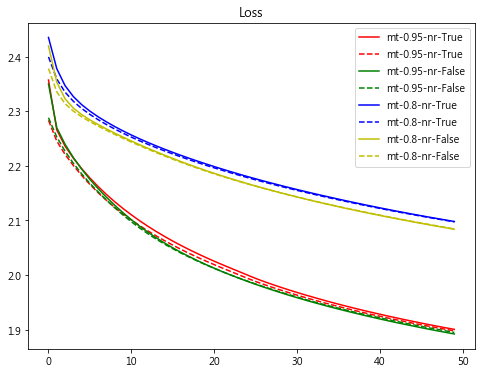

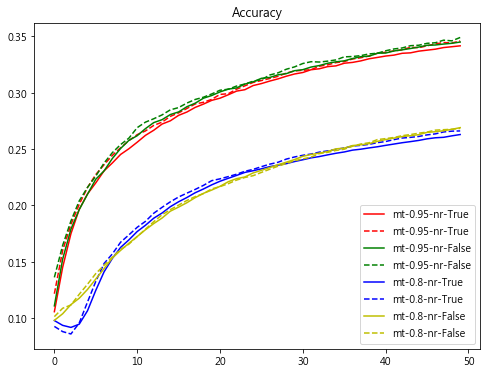

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()